# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Воспроизводиомсть `

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [314]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [468]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5172,Tata Indica V2 eLS,2016,200000,110000,Diesel,Individual,Manual,Second Owner,25.00,1396.0,69.00,5.0
541,Maruti Alto K10 VXI,2017,300000,30000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.05,5.0
494,Ford Freestyle Titanium Petrol BSIV,2018,700000,19100,Petrol,Individual,Manual,First Owner,19.00,1194.0,94.68,5.0
3992,Audi Q3 2.0 TDI Quattro Premium Plus,2016,2375000,30000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,5.0
4995,Hyundai Grand i10 CRDi Magna,2015,350000,80000,Diesel,Individual,Manual,Third Owner,24.00,1120.0,70.00,5.0
6156,Maruti Wagon R VXI BS IV,2018,440000,20000,Petrol,Individual,Manual,First Owner,20.51,998.0,67.04,5.0
3923,Hyundai Creta 1.4 CRDi S,2016,725000,100000,Diesel,Individual,Manual,First Owner,21.38,1396.0,88.70,5.0
3817,Maruti Baleno Delta 1.2,2018,625000,22000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,5.0
2982,Mercedes-Benz E-Class E 250 Elegance,2011,1190000,80000,Petrol,Individual,Automatic,Second Owner,10.93,2497.0,204.00,5.0
6726,Hyundai Getz 1.5 CRDi GVS,2008,175000,61000,Diesel,Dealer,Manual,Second Owner,17.10,1493.0,110.00,5.0


In [316]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [317]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [318]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Пропуски в mileage, engine, max_power, torque, seats

In [319]:
df_train[df_train.duplicated(keep=False)].sort_values(by='name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [408]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train)
profile.to_file("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [321]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [322]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and '.' in x else np.nan)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and '.' in x else np.nan)
df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_test['mileage'].fillna(df_test['mileage'].median(), inplace=True)

df_train['mileage'].info(), df_train['mileage'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


(None,
 count    6999.000000
 mean       19.422950
 std         3.986931
 min         0.000000
 25%        16.800000
 50%        19.300000
 75%        22.150000
 max        42.000000
 Name: mileage, dtype: float64)

In [323]:
df_train['engine'] = df_train['engine'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else np.nan)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else np.nan)
df_train['engine'].fillna(df_train['engine'].median(), inplace=True)
df_test['engine'].fillna(df_test['engine'].median(), inplace=True)

df_train['engine'].info(), df_train['engine'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


(None,
 count    6999.000000
 mean     1452.256894
 std       495.151300
 min       624.000000
 25%      1197.000000
 50%      1248.000000
 75%      1582.000000
 max      3604.000000
 Name: engine, dtype: float64)

In [324]:

df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x.split()[0]) if  isinstance(x, str) and len(x.split()) > 1 else np.nan)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and len(x.split()) > 1 else  np.nan)
df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_test['max_power'].fillna(df_test['max_power'].median(), inplace=True)

df_train['max_power'].info(), df_train['max_power'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: max_power
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


(None,
 count    6999.000000
 mean       91.302923
 std        35.248640
 min        32.800000
 25%        68.085000
 50%        82.000000
 75%       100.600000
 max       400.000000
 Name: max_power, dtype: float64)

In [325]:
df_train['seats'].fillna(df_train['seats'].median(), inplace=True)
df_test['seats'].fillna(df_test['seats'].median(), inplace=True)

df_train['seats'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: seats
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [326]:
duplicated = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)].sort_values(by='name')
duplicated

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0


In [327]:
len(duplicated)


1799

In [328]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [329]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [330]:
df_train.info()
# Мы уже все почистили на этапе проставки медианы

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5653 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 638.8+ KB


In [331]:
del df_test['torque']
del df_train['torque']


In [332]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 593.1+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [333]:
df_train['engine'].astype(int), df_test['engine'].astype(int)

(0       1248
 1       1498
 2       1396
 3       1298
 4       1197
         ... 
 6992    1086
 6993     998
 6994    1197
 6995    1493
 6996    1248
 Name: engine, Length: 5840, dtype: int64,
 0      2498
 1      1497
 2      1799
 3      1498
 4      1172
        ... 
 995    1086
 996    1197
 997    1396
 998    1197
 999    1498
 Name: engine, Length: 1000, dtype: int64)

In [334]:
df_train['seats'].astype(int), df_test['seats'].astype(int)

(0       5
 1       5
 2       5
 3       5
 4       5
        ..
 6992    5
 6993    5
 6994    5
 6995    5
 6996    5
 Name: seats, Length: 5840, dtype: int64,
 0      7
 1      5
 2      5
 3      5
 4      5
       ..
 995    5
 996    5
 997    5
 998    5
 999    5
 Name: seats, Length: 1000, dtype: int64)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [335]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,5840,5840.000000,5.840000e+03,5.840000e+03,5840,5840,5840,5840,5840.000000,5840.000000,5840.000000,5840.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,91,NaN,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN
mean,NaN,2013.428425,5.229601e+05,7.395224e+04,NaN,NaN,NaN,NaN,19.428611,1429.448973,87.952905,5.426712
std,NaN,4.095622,5.354320e+05,6.007114e+04,NaN,NaN,NaN,NaN,3.986026,485.662834,31.577030,0.982344
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,32.800000,2.000000
25%,NaN,2011.000000,2.500000e+05,3.900000e+04,NaN,NaN,NaN,NaN,16.950000,1197.000000,68.000000,5.000000
50%,NaN,2014.000000,4.050000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,82.000000,5.000000
75%,NaN,2017.000000,6.400000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.300000,1498.000000,99.000000,5.000000


In [336]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000.000000,1000.00000,1000.000000,1000.000000
unique,621,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,19.338050,1454.87600,90.865230,5.403000
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,3.951748,521.99574,34.887729,0.912921
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,0.000000,624.00000,34.200000,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,16.550000,1197.00000,69.000000,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,19.330000,1248.00000,83.100000,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,22.300000,1582.00000,102.000000,5.000000


In [337]:
assert df_train.shape == (5840, 13)

AssertionError: 



```
Почему размерность 13, мы уже удалили столбец torque?
```



## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

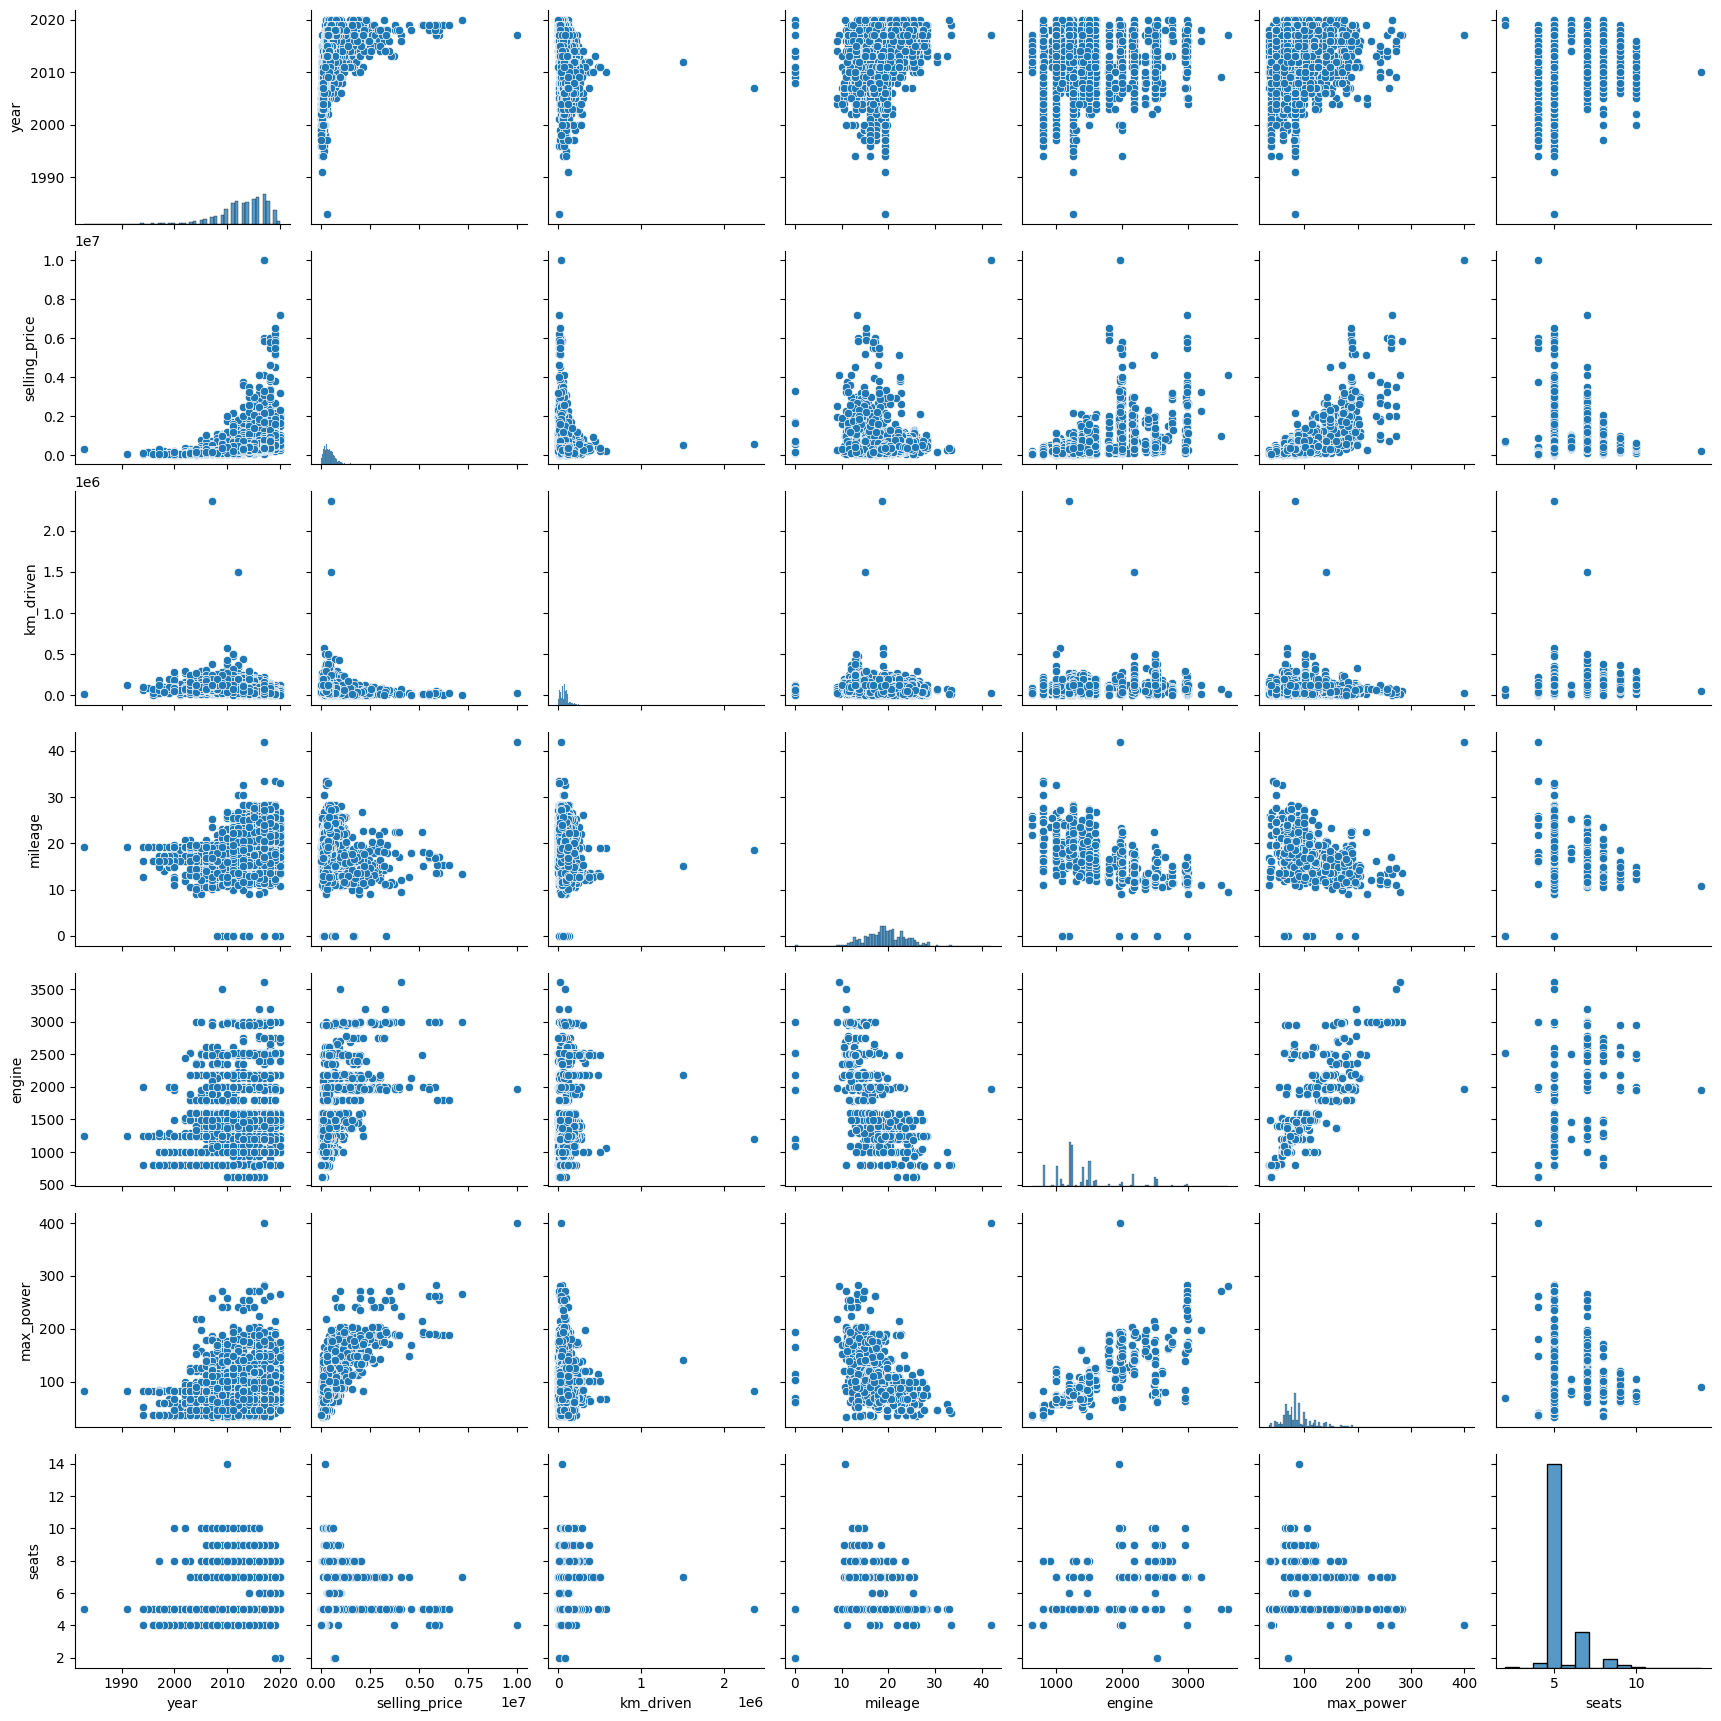

In [338]:
import seaborn as sns

sns.pairplot(df_train)

1. Чем новее год, тем выше цена (вероятно, есть корреляция)
2. Новые машины чаще стоят дороже, б/у дешевле (вероятно, есть корреляция)
3. Похоже на линейную зависимость в каком-то роде при росте max_power и engine относительно цены (вероятно, есть корреляция)
Другие переменные не такие показательные

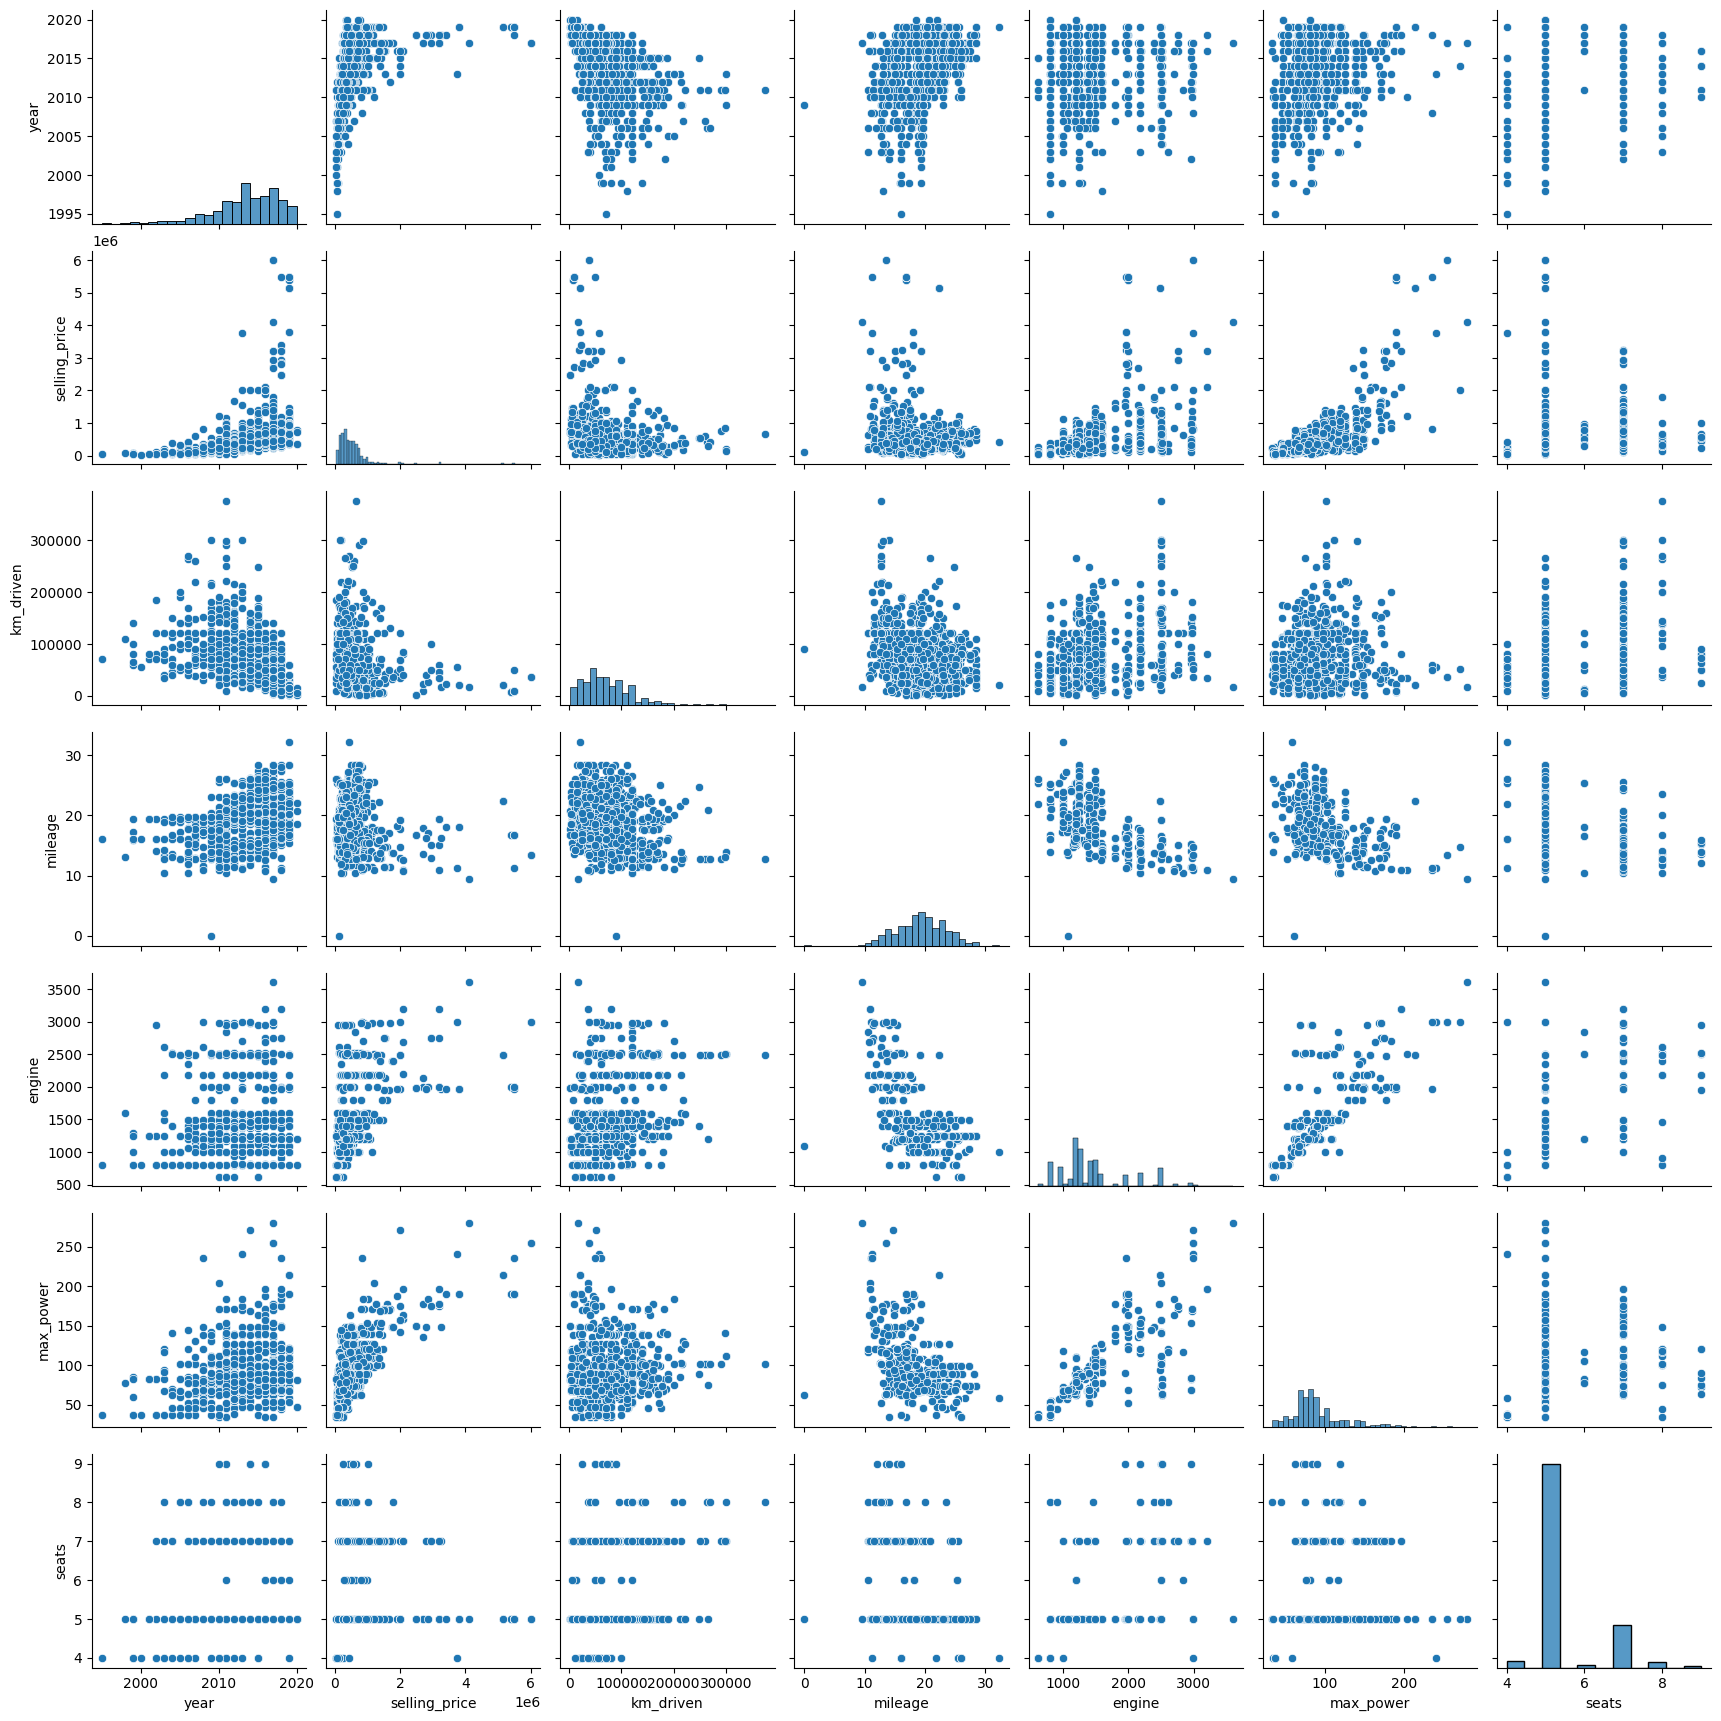

In [339]:
sns.pairplot(df_test)

`Данные похожи, но конечно тестовая выборка в нашем случае "немного шире" и имеет более разные точки`

(<Axes: xlabel='selling_price', ylabel='Count'>,
 <Axes: xlabel='selling_price', ylabel='Count'>)

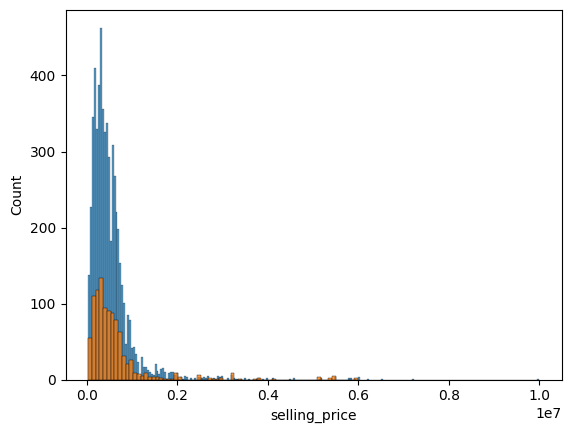

In [340]:
sns.histplot(df_train['selling_price']), sns.histplot(df_test['selling_price'])

В целом распределение целевой переменной похоже

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [341]:
df_train.corr(numeric_only=True)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156927,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.693682,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024581,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.374054,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681933,0.652172
max_power,0.156927,0.693682,0.024581,-0.374054,0.681933,1.000000,0.243964
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.243964,1.000000


<Axes: >

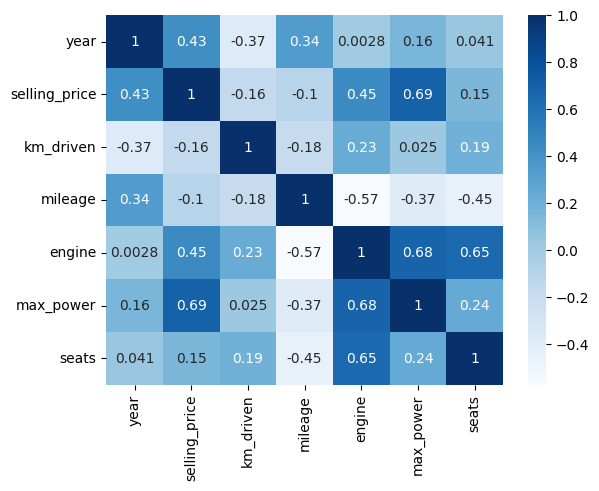

In [342]:
sns.heatmap(df_train.corr(numeric_only=True), cmap='Blues', annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Engine and Year
2. Max_Power and Selling Price, Max_Power and Egine, Seats and Engine
3. Да, при падающем годе, растет km_driven - это отрицательная корреляция, и у нас она -0.37


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

<Axes: xlabel='engine', ylabel='mileage'>

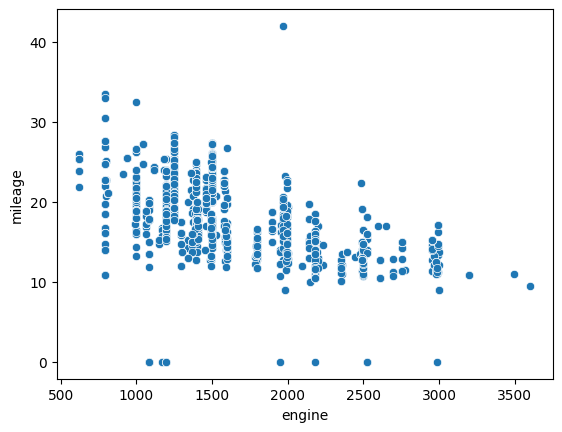

In [343]:
sns.scatterplot(df_train[['engine', 'mileage']], y='mileage', x='engine')

Сильная отрицательная корреляция, согласно .corr(), надо посмотреть отдельно было

<Axes: ylabel='selling_price'>

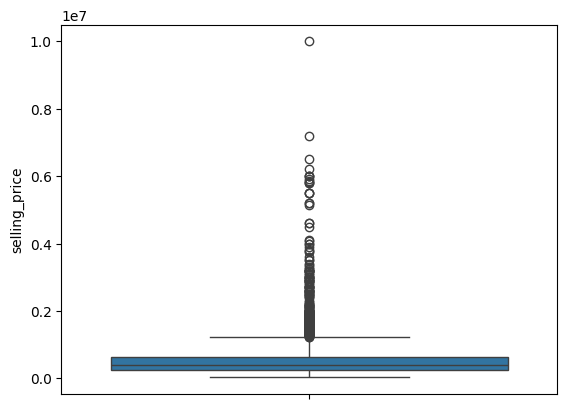

In [344]:
sns.boxplot(df_train['selling_price'])

<Axes: ylabel='selling_price'>

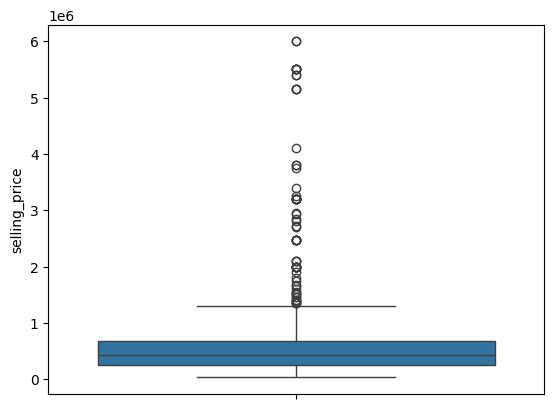

In [345]:
sns.boxplot(df_test['selling_price'])

Распределения похожи, но значительно много "выбрсов" в нашем изначальном датасете

<Axes: xlabel='year', ylabel='selling_price'>

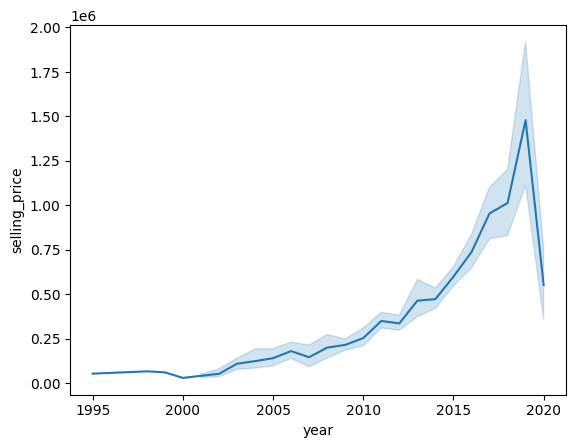

In [346]:
sns.lineplot(df_test[['selling_price', 'year']], x='year', y='selling_price')

Интересный график, что со временем в целом растет цена продажи, но в конце есть еще большое падение (видимо самые новые машины можно купить подешевле, аналогично что вероятно, чем выше год тем будет выше цена).

<Axes: xlabel='year', ylabel='engine'>

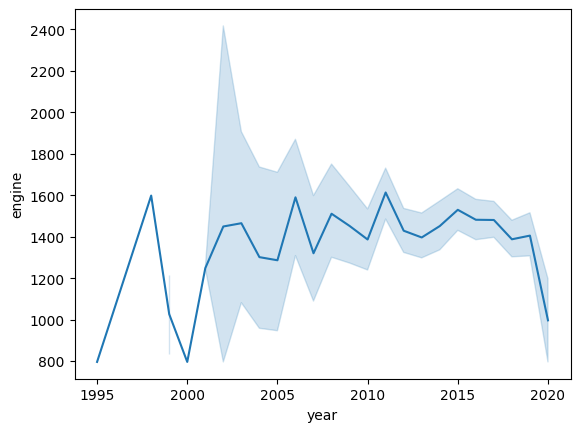

In [347]:
sns.lineplot(df_test[['engine', 'year']], x='year', y='engine')

Возможно в этом есть какая-то сезонность?

<Axes: xlabel='year', ylabel='km_driven'>

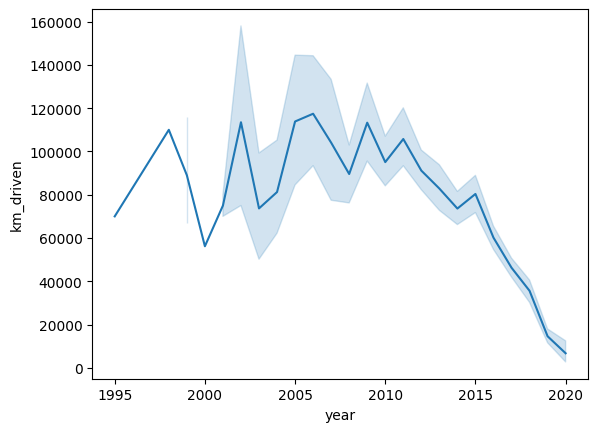

In [348]:
sns.lineplot(df_test[['km_driven', 'year']], x='year', y='km_driven')

В целом все понятно, что на старых машинах пробег больше

<Axes: xlabel='year', ylabel='max_power'>

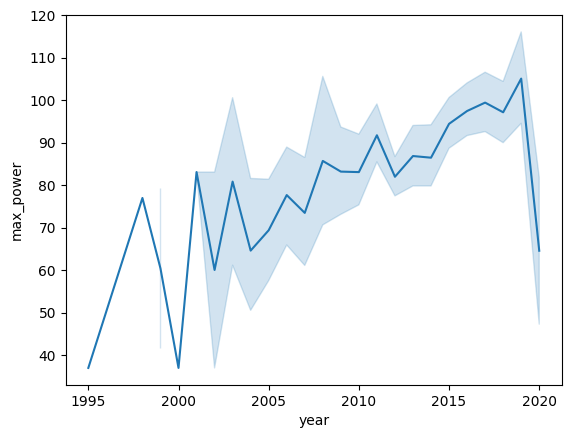

In [349]:
sns.lineplot(df_test[['max_power', 'year']], x='year', y='max_power')

В целом был устойчивый тренд к повышению максимальной мощности машин со временем, но к 2020 году он резко меняется вниз (видимо нужно что-то более экономичнее или производительнее)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [350]:
df = df_train.select_dtypes(include=['float64', 'int64']).copy()
df['seats'] = df_train['seats']
df
y_train = df['selling_price']
X_train = df[df.columns.difference(['selling_price'])]
X_train.shape

(5840, 6)

In [351]:
assert X_train.shape == (5840, 6)

In [352]:
df = df_test.select_dtypes(include=['float64', 'int64']).copy()
df['seats'] = df_test['seats']
df
y_test = df['selling_price']
X_test = df[df.columns.difference(['selling_price'])]
X_test.shape

(1000, 6)

In [353]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [354]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     1000 non-null   float64
 1   km_driven  1000 non-null   int64  
 2   max_power  1000 non-null   float64
 3   mileage    1000 non-null   float64
 4   seats      1000 non-null   float64
 5   year       1000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


In [355]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

linear_results = model.predict(X_test)

print(f'R2 = {r2_score(y_test, linear_results)}\nMSE = {MSE(y_test, linear_results)}')

R2 = 0.5946593477102349
MSE = 233001381697.27057


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [356]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

model = LinearRegression()

model.fit(scaler.transform(X_train), y_train)

linear_scaler_results = model.predict(scaler.transform(X_test))

print(f'R2 = {r2_score(y_test, linear_scaler_results)}\nMSE = {MSE(y_test, linear_scaler_results)}')

R2 = 0.5946593477101609
MSE = 233001381697.31305


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

<Axes: xlabel='columns', ylabel='coef'>

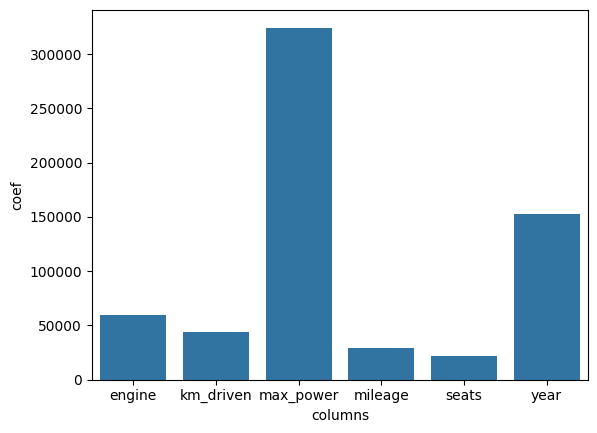

In [357]:
sns.barplot(pd.DataFrame({'coef': np.abs(model.coef_), 'columns': X_train.columns}), x='columns', y='coef')

Одназнчно max_power, но и год тоже не отстает

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [358]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(scaler.transform(X_train), y_train)

lasso_results = lasso.predict(scaler.transform(X_test))

print(f'R2 = {r2_score(y_test, lasso_results)}\nMSE = {MSE(y_test, lasso_results)}')

R2 = 0.5946581889353119
MSE = 233002047794.1859


<Axes: xlabel='columns', ylabel='coef'>

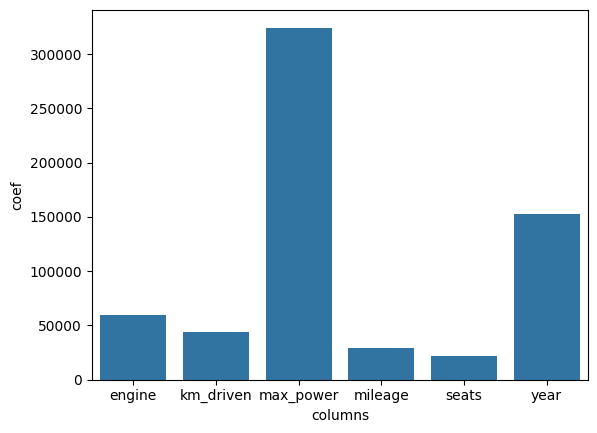

In [359]:
sns.barplot(pd.DataFrame({'coef': np.abs(lasso.coef_), 'columns': X_train.columns}), x='columns', y='coef')

Не занулила(

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [360]:
from sklearn.model_selection import GridSearchCV
import time


grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
gd = GridSearchCV(estimator=Lasso(), param_grid=grid, cv=10, scoring='r2')

time_start = time.time()
gd.fit(scaler.transform(X_train), y_train)
time_end = time.time()

print(f"Time elapsed in seconds for GridSearch: {time_end - time_start}")

Time elapsed in seconds for GridSearch: 0.2856302261352539


5 параметров, на 10 фолодов. 5 х 10 = 50 моделей

In [361]:
best_lasso = gd.best_estimator_

best_lasso_results = best_lasso.predict(scaler.transform(X_test))

print(f'R2 = {r2_score(y_test, best_lasso_results)}\nMSE = {MSE(y_test, best_lasso_results)}, best params {gd.best_params_}')

R2 = 0.5946477685222249
MSE = 233008037745.18982, best params {'alpha': 10}


<Axes: xlabel='columns', ylabel='coef'>

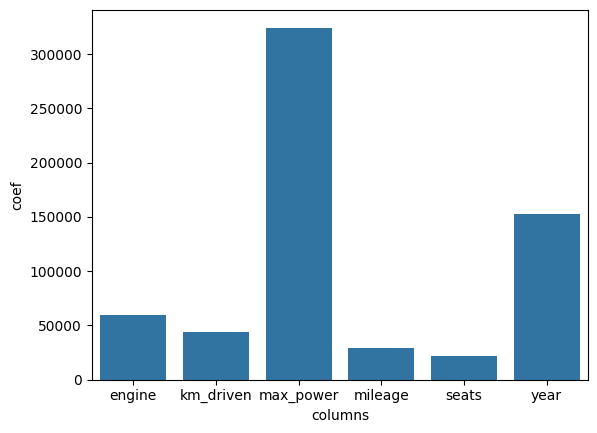

In [362]:
sns.barplot(pd.DataFrame({'coef': np.abs(best_lasso.coef_), 'columns': X_train.columns}), x='columns', y='coef')

Почему-то тоже не занулила

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [363]:
from sklearn.linear_model import ElasticNet

import time

en = ElasticNet(random_state=42)

grid = {'alpha': np.arange(0.01, 1, 0.01), 'l1_ratio': np.arange(0.1, 1.1, 0.1)}
gd = GridSearchCV(estimator=en, param_grid=grid, cv=10, scoring='r2')

time_start = time.time()
gd.fit(scaler.transform(X_train), y_train)
time_end = time.time()

print(f"Time elapsed in seconds for GridSearch: {time_end - time_start}")

Time elapsed in seconds for GridSearch: 44.84558582305908


99 разных альф, 10 разных l1_ratio, 10 фолдов = 9900 моделей

In [364]:
best_elastic = gd.best_estimator_

best_elastic_results = best_elastic.predict(scaler.transform(X_test))

print(f'R2 = {r2_score(y_test, best_elastic_results)}\nMSE = {MSE(y_test, best_elastic_results)}, best params {gd.best_params_}')

R2 = 0.5631335484850968
MSE = 251123311331.2043, best params {'alpha': 0.29000000000000004, 'l1_ratio': 0.5}


<Axes: xlabel='columns', ylabel='coef'>

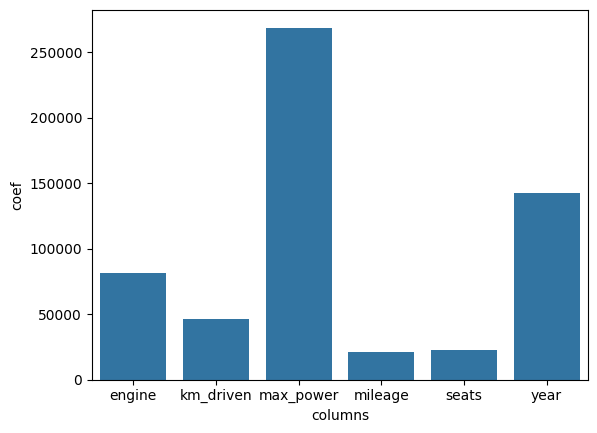

In [365]:
sns.barplot(pd.DataFrame({'coef': np.abs(best_elastic.coef_), 'columns': X_train.columns}), x='columns', y='coef')

О! Стало получше

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [366]:
df_train['name'].unique(), df_train['name'].nunique()

(array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
        'Hyundai i20 Sportz Diesel', ..., 'Tata Nexon 1.5 Revotorq XT',
        'Ford Freestyle Titanium Plus Diesel BSIV',
        'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object),
 1924)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Можно попробовать сделать one hot по марке автомобиля, это наверное должно быть существено!

In [367]:
df_train['name'].apply(lambda x: x.split()[0]).unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [433]:
X_train_cat = df_train.copy()
Y_train_cat = X_train_cat['selling_price']
X_train_cat = X_train_cat.drop(columns=['selling_price'])
X_train_cat['seats'] = X_train_cat['seats'].astype(object)

X_test_cat = df_test.copy()
Y_test_cat = X_test_cat['selling_price']
X_test_cat = X_test_cat.drop(columns=['selling_price'])
X_test_cat['seats'] = X_test_cat['seats'].astype(object)

In [460]:
X_train_cat.info(), X_train_cat.shape, X_test_cat.info(), X_test_cat.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5840 non-null   object 
 1   year          5840 non-null   int64  
 2   km_driven     5840 non-null   int64  
 3   fuel          5840 non-null   object 
 4   seller_type   5840 non-null   object 
 5   transmission  5840 non-null   object 
 6   owner         5840 non-null   object 
 7   mileage       5840 non-null   float64
 8   engine        5840 non-null   float64
 9   max_power     5840 non-null   float64
 10  seats         5840 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 676.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1000 non-null   object 
 1   year          1000 non-null   int64

(None, (5840, 11), None, (1000, 11))

In [459]:
assert X_train_cat.shape == (5840, 10)

AssertionError: 

Мы оставили name

In [371]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840,5840.0
unique,1924,4,3,2,5,9.0
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,5.0
freq,91,3177,5223,5336,3603,4618.0




```
# Бонусная часть внутри пайплайна!
```



### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [461]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.linear_model import Ridge

categorical_columns = list(X_train_cat.select_dtypes(include='object').columns)
categorical_columns.remove('name')

numerical_columns =  list(X_train_cat.select_dtypes(include=['float', 'int']).columns)
print(categorical_columns, numerical_columns)

name_transformer = FunctionTransformer(lambda x: x.str.split().str[0].to_frame())

preprocessor = ColumnTransformer(
    transformers=[
        ('name_transform', Pipeline([
            ('split', name_transformer),
            ('encode', OneHotEncoder(handle_unknown='ignore', drop='first'))
            ]), 'name'),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])


# Мы сделали пайплайн для удобства, сейчас поэтому мы сейчас не увидим результата, но он будет при обучении

['fuel', 'seller_type', 'transmission', 'owner', 'seats'] ['year', 'km_driven', 'mileage', 'engine', 'max_power']


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [462]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__alpha': np.logspace(-3, 3, 7)
}

gd = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='r2', error_score='raise')

time_start = time.time()
gd.fit(X_train_cat, y_train)
time_end = time.time()

print(f"Time elapsed in seconds for GridSearch: {time_end - time_start}")

best_ridge = gd.best_estimator_

best_ridge_results = best_ridge.predict(X_test_cat)

print(f'R2 = {r2_score(y_test, best_ridge_results)}\nMSE = {MSE(y_test, best_ridge_results)}, best params {gd.best_params_}')

Time elapsed in seconds for GridSearch: 5.605759382247925
R2 = 0.7807144545530696
MSE = 126051593361.64742, best params {'regressor__alpha': 1.0}


Удалось!

<Axes: xlabel='index', ylabel='coef'>

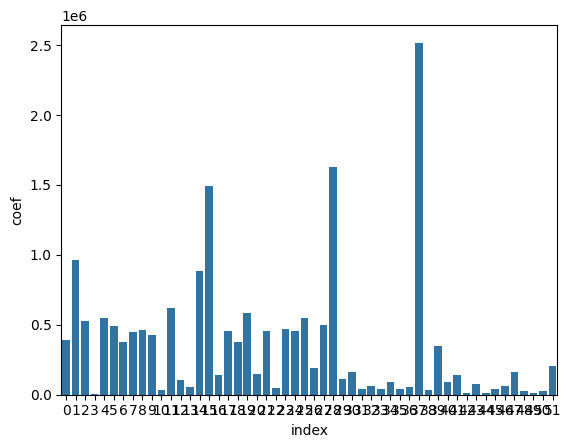

In [463]:
sns.barplot(data=pd.DataFrame({'coef': np.abs(best_ridge.named_steps['regressor'].coef_)}).reset_index(), x='index', y='coef')

Для сравненеия можно без name, интересно, что будет

In [464]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

param_grid = {
    'regressor__alpha': np.logspace(-3, 3, 7)
}


gd = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='r2', error_score='raise')

time_start = time.time()
gd.fit(X_train_cat, y_train)
time_end = time.time()

print(f"Time elapsed in seconds for GridSearch: {time_end - time_start}")

ridge = gd.best_estimator_

ridge_results = ridge.predict(X_test_cat)

print(f'R2 = {r2_score(y_test, ridge_results)}\nMSE = {MSE(y_test, ridge_results)}, best params {gd.best_params_}')

Time elapsed in seconds for GridSearch: 3.9621191024780273
R2 = 0.6457514393785154
MSE = 203632188439.04587, best params {'regressor__alpha': 10.0}


<Axes: xlabel='index', ylabel='coef'>

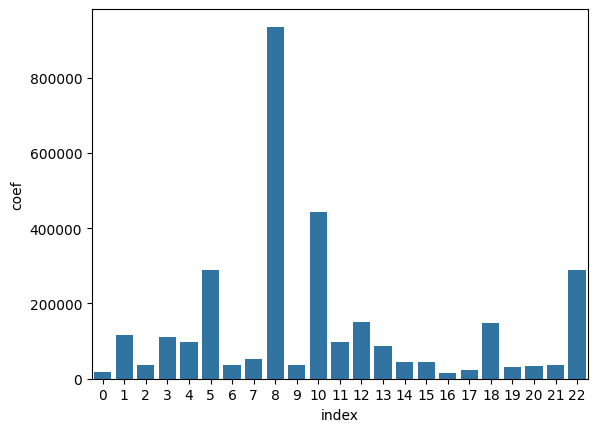

In [465]:
sns.barplot(data=pd.DataFrame({'coef': np.abs(ridge.named_steps['regressor'].coef_)}).reset_index(), x='index', y='coef')

Красота. `Name` улучшает качество!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [466]:
def business_metric(y_true: np.array, y_pred: np.array):
  return ((np.abs(y_true - y_pred) / y_true) <= 0.1).mean()

print("Бизнесовая метрика:", business_metric(y_test, linear_results))
print("Бизнесовая метрика:", business_metric(y_test, linear_scaler_results))
print("Бизнесовая метрика:", business_metric(y_test, lasso_results))
print("Бизнесовая метрика:", business_metric(y_test, best_lasso_results))
print("Бизнесовая метрика:", business_metric(y_test, best_elastic_results))
print("Бизнесовая метрика:", business_metric(y_test, best_ridge_results))
print("Бизнесовая метрика:", business_metric(y_test, ridge_results))

Бизнесовая метрика: 0.224
Бизнесовая метрика: 0.224
Бизнесовая метрика: 0.224
Бизнесовая метрика: 0.224
Бизнесовая метрика: 0.243
Бизнесовая метрика: 0.305
Бизнесовая метрика: 0.247


Лучшая модель Ridge вместе с name!


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Предпологаю Elena Kantonistova